### Makin models from all the features

I make sure that columns are the right data types and fill nan values with the appropriate values. I also made season and reno columns. season is categorical and contains what season the sale happened in. reno is 1 for has been renovated and 0 for hasn't been renovated. I did a linear regression with and without a polynomial features. I also tried SGD and decision tree. I think that SGD and decision tree aren't better and take a while to run. I'm just gonna stick with the first two. I made an error before loading the other models to the notebook stops running after the polynomial features linear regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [2]:
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/kc_house_data.csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There was a question mark in the sqft basement column. Replaced it with the mean.

In [4]:
#there was a '?' in the column so i replaced with nan
df['sqft_basement'].replace('?',np.nan,inplace=True)
#then made column floats
df['sqft_basement'] = df['sqft_basement'].astype(float)
#calcd mean
base_sqft_mean = df['sqft_basement'].mean()
#placed nans with mean
df['sqft_basement'].fillna(base_sqft_mean,inplace=True)
# df.sqft_basement.unique()

I'm going to drop the top 20 most expensive to get a more normal distribution for price.

In [5]:
drop_rows = df['price'].sort_values(ascending=False)[:20]
df.drop(drop_rows.index,axis=0,inplace=True)

Looks a little bit better. I'm going to roll with it for now, but in the final model, I will drop more because this was only about a tenth of a percent of the data.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

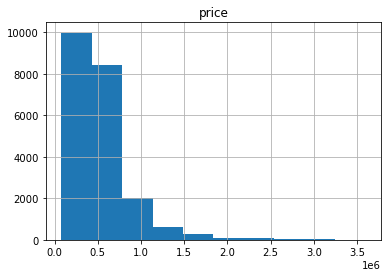

In [6]:
df.hist('price')

Lets see what other null values there are.

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               62
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3841
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Replacing year renovated null values with zero because they have not been renovated. It doesn't make sense to replace with the median values. I created a new column to replace yr renovated that is a 0 or 1. 0 being not renovated and 1 being renovated.

In [8]:
#remove 0s in yr_rend
df['yr_renovated'].fillna(0,inplace=True)
#0 for not renovated
#1 for renovated
df['reno'] = 1
df['waterfront'].fillna(0,inplace=True)
df['view'].fillna(0,inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1


Making all rows in the reno column zero where the yr renovated is zero.

In [60]:
df['reno'].loc[df['yr_renovated'] == 0] = 0
df

C:\Users\umbac\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,reno,price_per_sqft,year,day,month,season,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,188.050847,2014.0,13.0,10.0,fall,8260,0.428571,1392400,1.0000
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1,209.338521,2014.0,9.0,12.0,winter,17990,0.428571,6604900,5.0625
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,233.766234,2015.0,25.0,2.0,winter,4620,0.500000,592900,1.0000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,308.163265,2014.0,9.0,12.0,winter,13720,0.714286,3841600,9.0000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,303.571429,2015.0,18.0,2.0,winter,13440,0.375000,2822400,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,0,235.294118,2014.0,21.0,5.0,spring,12240,0.375000,2340900,6.2500
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,0,173.160173,2015.0,23.0,2.0,winter,18480,0.375000,5336100,6.2500
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,0,394.216667,2014.0,23.0,6.0,summer,7140,0.428571,1040400,0.5625
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,0,250.000000,2015.0,16.0,1.0,winter,12800,0.375000,2560000,6.2500


This was an idea I had to use the data column. I split the date into columns for the month, day, and year. These did not prove to be useful and I also don't think that it is smart to leave them it. This is because we are trying to predict a sale price at a later date, not a sale price in this date range.

In [10]:
df['date'] = df['date'].map(lambda x: x.split('/'))
df['year'] = df['date'].map(lambda x: x[2])
df['day'] = df['date'].map(lambda x: x[1])
df['month'] = df['date'].map(lambda x: x[0])
df['day'] = df['day'].astype(float)
df['year'] = df['year'].astype(float)
df['month'] = df['month'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21577 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21577 non-null  int64  
 1   date            21577 non-null  object 
 2   price           21577 non-null  float64
 3   bedrooms        21577 non-null  int64  
 4   bathrooms       21577 non-null  float64
 5   sqft_living     21577 non-null  int64  
 6   sqft_lot        21577 non-null  int64  
 7   floors          21577 non-null  float64
 8   waterfront      21577 non-null  float64
 9   view            21577 non-null  float64
 10  condition       21577 non-null  int64  
 11  grade           21577 non-null  int64  
 12  sqft_above      21577 non-null  int64  
 13  sqft_basement   21577 non-null  float64
 14  yr_built        21577 non-null  int64  
 15  yr_renovated    21577 non-null  float64
 16  zipcode         21577 non-null  int64  
 17  lat             21577 non-null 

Dropped date column after making new columns.

In [11]:
df.drop('date',inplace=True,axis=1)
# df.drop('yr_renovated',inplace=True,axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,reno,price_per_sqft,year,day,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,98178,47.5112,-122.257,1340,5650,0,188.050847,2014.0,13.0,10.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,98125,47.7210,-122.319,1690,7639,1,209.338521,2014.0,9.0,12.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,98028,47.7379,-122.233,2720,8062,0,233.766234,2015.0,25.0,2.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,98136,47.5208,-122.393,1360,5000,0,308.163265,2014.0,9.0,12.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,98074,47.6168,-122.045,1800,7503,0,303.571429,2015.0,18.0,2.0


I tried making some categorical season columns based on the month. I though that this would apply to any given year better. It also did not contribute much and was left out of the final model.

In [61]:
df['season'] = 's'
df['season'].loc[ (df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8)] ='summer'
df['season'].loc[ (df['month'] == 9) | (df['month'] == 10) | (df['month'] == 11)] ='fall'
df['season'].loc[ (df['month'] == 12) | (df['month'] == 1) | (df['month'] == 2)] ='winter'
df['season'].loc[ (df['month'] == 3) | (df['month'] == 4) | (df['month'] == 5)] ='spring'

df['season'].value_counts()

C:\Users\umbac\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\umbac\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\umbac\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

spring    6512
summer    6322
fall      5048
winter    3695
Name: season, dtype: int64

Tried some feature engineering based on the best interactions between features. More can be found in the interactions notebook.

In [13]:
df['sqft_living_times_grade'] = df['sqft_living'] * df['grade']
df['condition_div_grade'] = df['condition'] / df['grade']
df['sqft_living_sq'] = df['sqft_living']**2
df['bathrooms_sq'] = df['bathrooms']**2

I saved the dataframe here so that we could all use it and be working from the same dataset.

In [14]:
df.to_csv('cleaned_df')

In [15]:
df.columns
#save the data here so we can all use it
#ie drop outliers from the price columns

#try distance from a coordinate space and price

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'reno', 'price_per_sqft', 'year', 'day',
       'month', 'season', 'sqft_living_times_grade', 'condition_div_grade',
       'sqft_living_sq', 'bathrooms_sq'],
      dtype='object')

A heatmap of all current feature correlations.

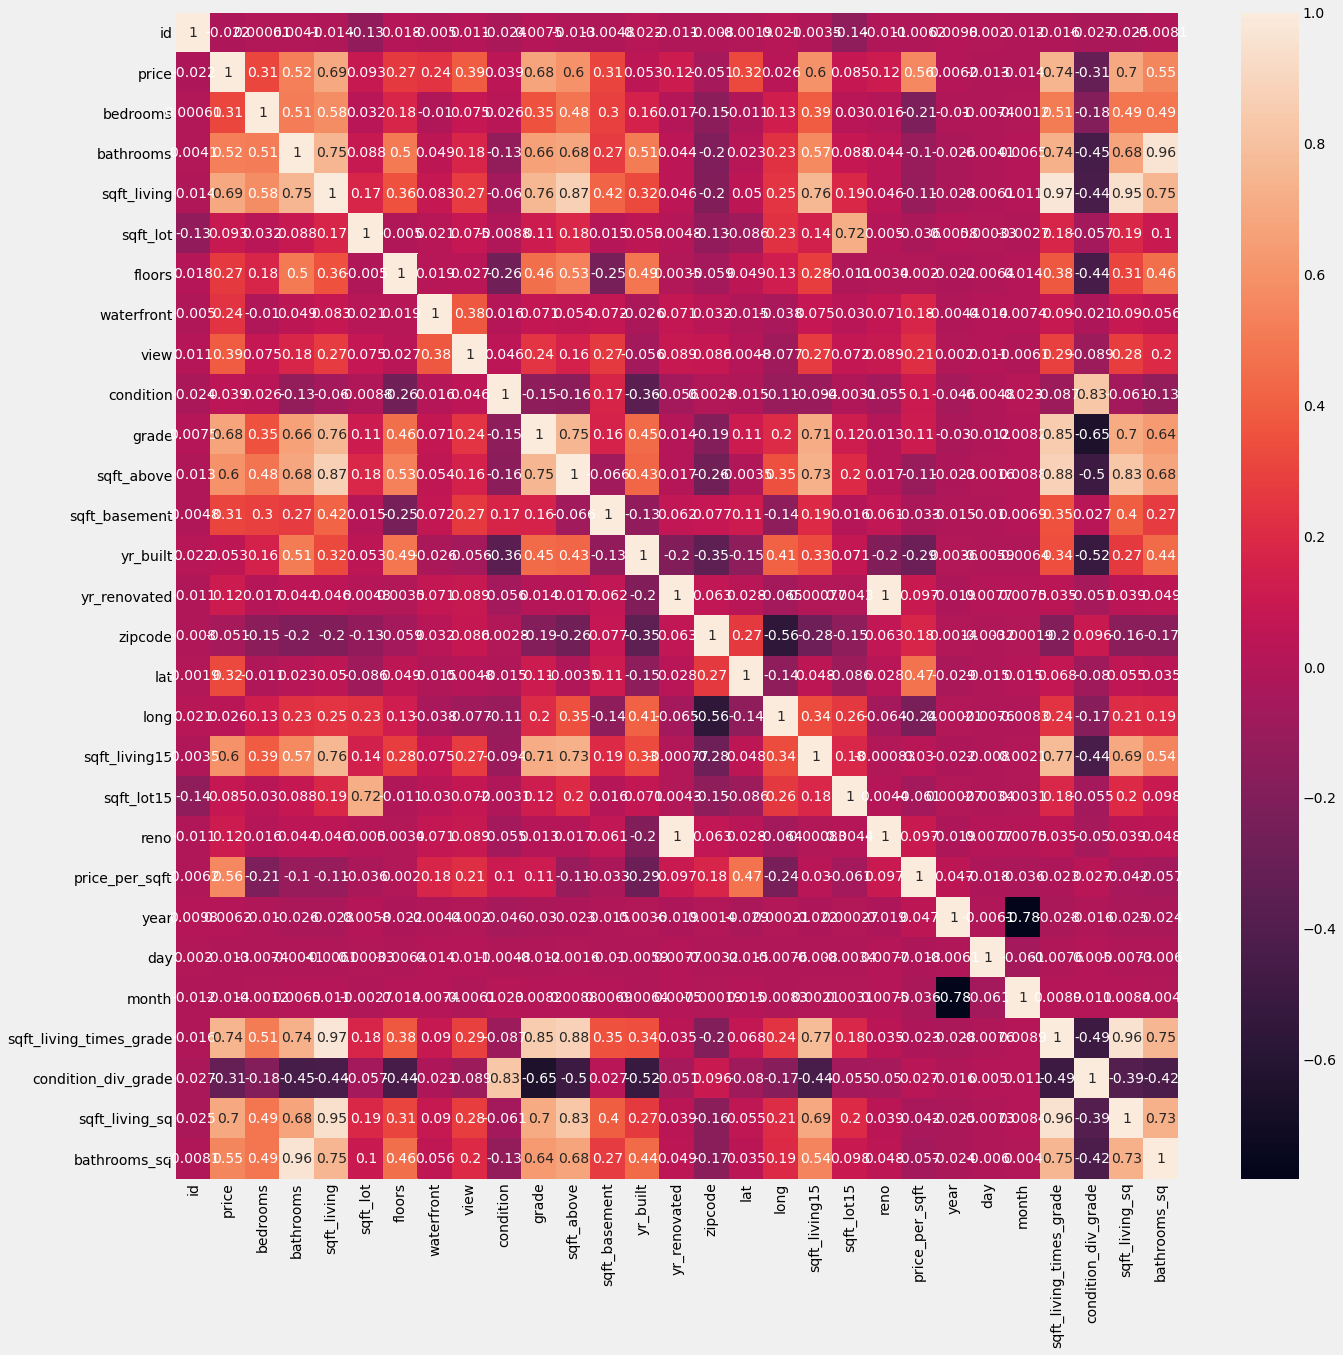

In [64]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(df.corr(),annot=True);

This is the beginning of all the modeling.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


A simple linear regression to start.

In [19]:
reg = LinearRegression()

In [20]:
#what are my categories?
#'season','reno'
categoricals = ['bedrooms','bathrooms_sq','waterfront','floors','view','grade','condition','zipcode','reno']
continuous = ['price','sqft_living_sq','sqft_lot','sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','sqft_lot15','month','year','yr_renovated']

df_cont = df[continuous]


Encode categoricals, combine with other features and create training and testing sets.

In [23]:
df_ohe = pd.get_dummies(df[categoricals])

preprocessed = pd.concat([df_cont, df_ohe],axis=1)
X = preprocessed.drop('price',axis=1)

scale = StandardScaler()

X = scale.fit_transform(X)

X = pd.DataFrame(X)

y = preprocessed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Fit the model and get predictions

In [24]:
reg.fit(X_train,y_train)

y_hat_train = reg.predict(X_train)
y_hat_test = reg.predict(X_test)

In [27]:
cv = KFold(n_splits=10,shuffle=True)
cv_score = cross_val_score(reg,X,y,scoring='r2',cv=cv)
cv_score.mean()

0.7172622147679812

Its an alright score. I imported mse to get a better idea.

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
RMSE_test = mean_squared_error(y_test,y_hat_test,squared=False)
RMSE_train = mean_squared_error(y_train,y_hat_train,squared=False)

In [30]:
RMSE_test,RMSE_train

(177430.61699493043, 181603.11097267485)

In [31]:
RMSE_diff = abs(RMSE_test - RMSE_train)
RMSE_diff

4172.493977744423

Its really not that great. I tried polynomial features, SGD, and decision trees next. Non were spectacular in any way.

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)


In [33]:
poly.fit_transform(X_train)
poly.fit_transform(X_test)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_train,y_train)

y_hat_train = lin_reg2.predict(X_train)
y_hat_test = lin_reg2.predict(X_test)

poly_train_split = r2_score(y_test, y_hat_test)

In [34]:
poly_RMSE_test = mean_squared_error(y_test,y_hat_test)
poly_RMSE_train = mean_squared_error(y_train,y_hat_train)

In [35]:
poly_RMSE_diff = abs(poly_RMSE_test - poly_RMSE_train)
poly_RMSE_diff

1498066067.7519646

In [36]:
poly_train_split

0.7343427488716935

In [37]:
cv = KFold(n_splits=10,shuffle=True)
cv_score = cross_val_score(lin_reg2,X,y,scoring='r2',cv=cv)
cv_score.mean()

0.7180852859159943

In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

In [39]:
reg = make_pipeline(StandardScaler(),
                                 SGDRegressor(max_iter=10000, tol=1e-3))
reg.fit(X_train,y_train)
y_hat_train = reg.predict(X_train)
y_hat_test = reg.predict(X_test)

In [41]:
RMSE_test = mean_squared_error(y_test,y_hat_test,squared=False)
RMSE_train = mean_squared_error(y_train,y_hat_train,squared=False)

In [42]:
RMSE_diff = abs(RMSE_test - RMSE_train)
RMSE_diff

3338.7107792153256

In [52]:
from sklearn import tree

In [53]:
clf = tree.DecisionTreeRegressor(criterion='mse')

In [54]:
clf.fit(scaled_X_train,scaled_y_train.reshape(-1,1))

y_hat_train =  clf.predict(scaled_X_train)
y_hat_test = clf.predict(scaled_X_test)

In [56]:
cv = KFold(n_splits=10,shuffle=True)
cv_score = cross_val_score(clf,X,y,scoring = 'r2',cv = cv,n_jobs=-1)

In [57]:
cv_score.mean()

0.7399614635235789

In [58]:
RMSE_test = mean_squared_error(y_test,y_hat_test,squared=False)
RMSE_train = mean_squared_error(y_train,y_hat_train,squared=False)

In [59]:
RMSE_diff = abs(RMSE_test - RMSE_train)
RMSE_diff

5060.663724017562